In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# （1）

In [2]:
def babylonian(y, epsilon, x0=1.0):
    root = math.sqrt(y)
    x_n = float(x0)
    n = 0
    max_iterations = 1000  # 设置最大迭代步数，防止死循环
    
    for n in range(max_iterations):
        error = abs(x_n - root)
        
        if error < epsilon:
            return x_n, n, error  # 检查是否满足误差要求

        if n == max_iterations - 1:    
            return x_n, n, error  # 如果达到最大迭代次数，返回当前结果
        
        x_next = 0.5 * (x_n + y / x_n)  # 迭代公式
        
        x_n = x_next
        n += 1


In [41]:
babylonian(2, 1e-10, 1)  # 测试

(1.4142135623746899, 4, 1.5947243525715749e-12)

# (2)

In [21]:
epsilon_list = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
epsilon_0 = epsilon_list[10]  # 选择给定误差值
y = 2.0  # 要开方的目标数
x0 = 1.0  # x0初始值

In [ ]:
def error_analysis(y, epsilon_0, x0):  # 定义误差分析函数，记录每次迭代后的误差变化
    root = math.sqrt(y)
    x_n = float(x0)
    error_list = []
    max_iterations = 1000  # 设置最大迭代步数，防止死循环(若误差达不到要求)
    
    for _ in range(max_iterations):
        error = abs(x_n - root)
        error_list.append(error)
        
        if error < epsilon_0:
            break  # 数值不再变化时停止

        x_next = 0.5 * (x_n + y / x_n)
        x_n = x_next
        
    return error_list

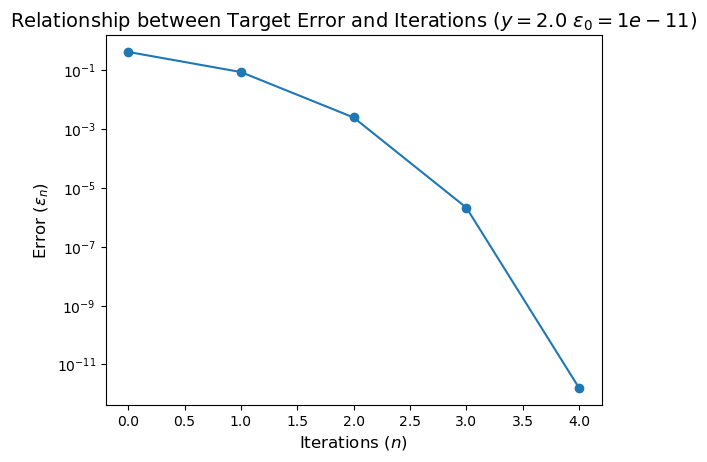

In [32]:
error_list = error_analysis(y, epsilon_0, x0)  # 用error_analysis函数算出收敛过程中的误差变化并记录

plt.plot(range(len(error_list)), error_list, 'o-')
plt.yscale('log')
plt.xlabel(f'Iterations ($n$)', fontsize=12)
plt.ylabel(f'Error ($\epsilon_n$)', fontsize=12)
plt.title(f'Relationship between Target Error and Iterations ($y={y}\ \epsilon_0={epsilon_0}$)', fontsize=14)
plt.show()

# （3）

In [34]:
y = 2.0  # 要开方的目标数
epsilon_0 = 1e-10  # 设定给定误差值
x0_values = [0.01, 0.1, 1, 10, 100, 1000]  # 设定可选的x0初始值列表

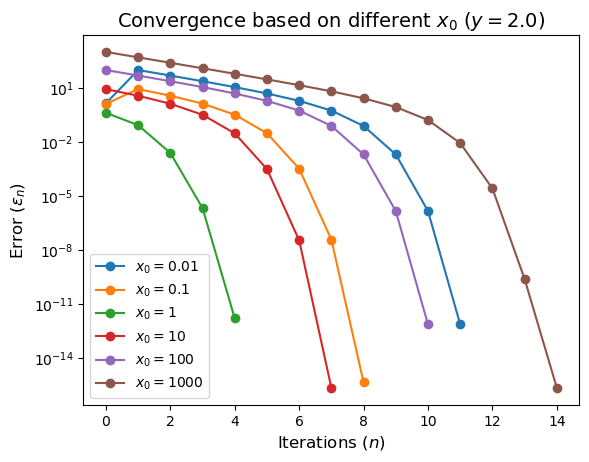

In [35]:
for x0 in x0_values:
    errors = error_analysis(y, epsilon_0, x0)  # 用error_analysis函数算出对不同x0收敛过程中的误差变化并记录
    plt.plot(range(len(errors)), errors, 'o-', label=f'$x_0={x0}$')

plt.yscale('log')
plt.xlabel(f'Iterations ($n$)', fontsize=12)
plt.ylabel(f'Error ($\epsilon_n$)', fontsize=12)
plt.title(f'Convergence based on different $x_0$ ($y={y}$)', fontsize=14)
plt.legend()
plt.show()

# （4）

In [ ]:
y = 2.0  # 要开方的目标数

In [39]:
def babylonian2(y, epsilon=1e-10, x0=1.0):
    x_list = [float(x0)]
    error_list = []
    
    x_n = float(x0)
    max_iteration = 1000
    
    for _ in range(max_iteration):
        x_next = 0.5 * (x_n + y / x_n)
        
        error_difference = abs(x_next - x_n)
        x_list.append(x_next)  # 记录每一步的x_n
        error_list.append(error_difference)  # 记录每一步的epsilon_n
        
        if error_difference < epsilon:
            break  # 达到误差要求时停止
            
        x_n = x_next
        
    return x_list, error_list

In [42]:
babylonian2(y, epsilon=1e-10, x0=1.0)  # 测试

([1.0,
  1.5,
  1.4166666666666665,
  1.4142156862745097,
  1.4142135623746899,
  1.414213562373095],
 [0.5,
  0.08333333333333348,
  0.002450980392156854,
  2.1238998197947723e-06,
  1.5949463971764999e-12])

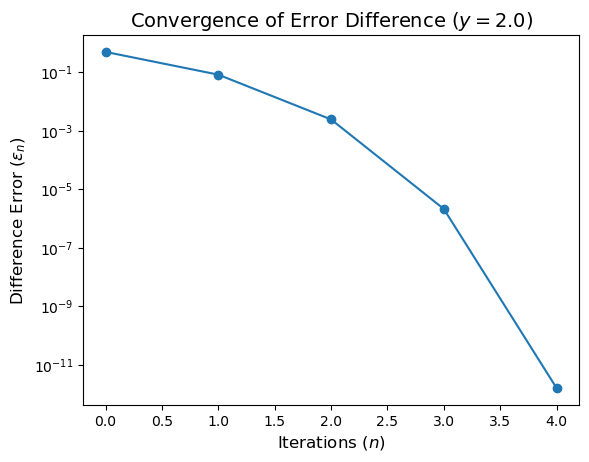

In [ ]:
_, list_epsilon_n = babylonian2(y, epsilon=1e-10, x0=1.0)  #用babylonian2函数算出epsilon_1到epsilon_n
plt.plot(range(len(list_epsilon_n)), list_epsilon_n, '-o')
plt.yscale('log')
plt.xlabel('Iterations ($n$)', fontsize=12)
plt.ylabel('Difference Error ($\epsilon_n$)', fontsize=12)
plt.title(f'Convergence of Error Difference ($y = {y}$)', fontsize=14)
plt.show()